# Aim: Implementing the Desicion Tree Classifier

**Step 1: Import necessary libraries.**

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

**Step 2: Prepare dataset.**

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']

# Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

**Step 3: Digitize the data set using encoding**

In [5]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


**Step 4: Merge different features to prepare dataset**

In [11]:
import pandas as pd
import numpy as np

df0 = pd.DataFrame(data = Outlook_encoded,  
                  columns = ['Outlook'])

df1 = pd.DataFrame(data = Temperature_encoded,  
                  columns = ['Temerature'])

df2 = pd.DataFrame(data = Humidity_encoded,  
                  columns = ['Humidity'])

df3 = pd.DataFrame(data = Wind_encoded,  
                  columns = ['Wind'])

df4 = pd.DataFrame(data = Play_encoded,  
                  columns = ['Play'])

df = pd.concat([df0, df1, df2, df3, df4], axis=1)

print(df)

    Outlook  Temerature  Humidity  Wind  Play
0         1           1         0     0     0
1         1           1         0     1     0
2         0           1         0     0     1
3         2           2         0     0     1
4         2           0         1     0     1
5         2           0         1     1     0
6         0           0         1     1     1
7         1           2         0     0     0
8         1           0         1     0     1
9         2           2         1     0     1
10        1           2         1     1     1
11        0           2         0     1     1
12        0           1         1     0     1
13        2           2         0     1     0


**Extracting Datasets**

In [23]:
x = df.drop(columns="Play")

y = df["Play"]

feature_names = x.columns

labels = y.unique()

print("Features : ", feature_names)
print("Labels : ", labels)

Features :  Index(['Outlook', 'Temerature', 'Humidity', 'Wind'], dtype='object')
Labels :  [0 1]


**Splitting data into train and test**

In [17]:
from sklearn.model_selection import train_test_split

X_train, test_x, y_train, test_y = train_test_split(x,y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test

X_train.shape, test_x.shape

((11, 4), (3, 4))

**Step 5: Train ’Create and Train DecisionTreeClassifier’**

In [19]:
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state = 0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09917355371900827


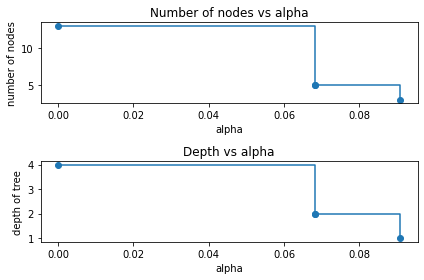

In [20]:
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

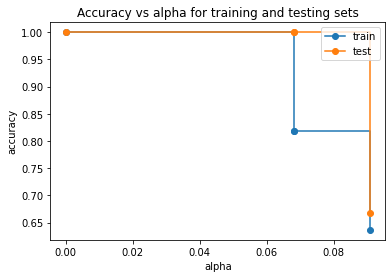

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [22]:
clf = DecisionTreeClassifier(ccp_alpha=0.04, criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04)

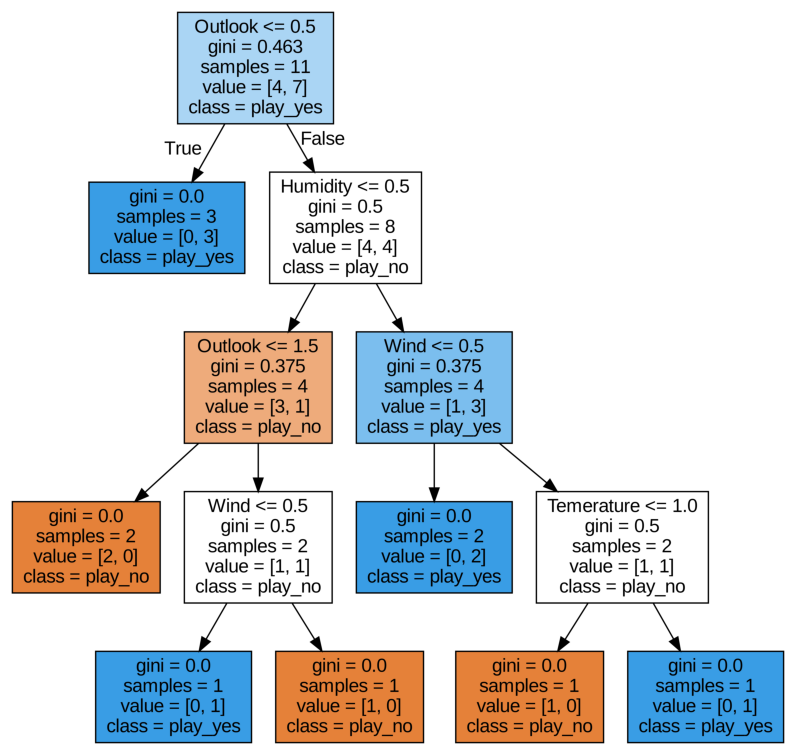

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot', feature_names = feature_names, class_names=['play_no','play_yes'], filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [25]:
test_pred_decision_tree = clf.predict(test_x)

In [28]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_y,test_pred_decision_tree)
print(confusion_matrix)

# matrix_df = pd.DataFrame(confusion_matrix)

# ax = plt.axes()

# sns.set(font_scale=1.3)

# plt.figure(figsize=(10,7))

# sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

# ax.set_title('Confusion Matrix - Decision Tree')

# ax.set_xlabel("Predicted label", fontsize =15)

# ax.set_xticklabels(['']+labels)

# ax.set_ylabel("True Label", fontsize=15)

# ax.set_yticklabels(list(labels), rotation = 0)

# plt.show()

[[1 0]
 [0 2]]


# Exercise

In [74]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [75]:
import pandas as pd
import numpy as np

df0 = pd.DataFrame(data = Outlook,  
                  columns = ['Outlook'])

df1 = pd.DataFrame(data = Temperature,  
                  columns = ['Temerature'])

df2 = pd.DataFrame(data = Humidity,  
                  columns = ['Humidity'])

df3 = pd.DataFrame(data = Wind,  
                  columns = ['Wind'])

df4 = pd.DataFrame(data = Play,  
                  columns = ['Play'])

df = pd.concat([df0, df1, df2, df3, df4], axis=1)

print(df)

     Outlook Temerature Humidity   Wind Play
0      Rainy        Hot     High  False   No
1      Rainy        Hot     High   True   No
2   Overcast        Hot     High  False  Yes
3      Sunny       Mild     High  False  Yes
4      Sunny       Cool   Normal  False  Yes
5      Sunny       Cool   Normal   True   No
6   Overcast       Cool   Normal   True  Yes
7      Rainy       Mild     High  False   No
8      Rainy       Cool   Normal  False  Yes
9      Sunny       Mild   Normal  False  Yes
10     Rainy       Mild   Normal   True  Yes
11  Overcast       Mild     High   True  Yes
12  Overcast        Hot   Normal  False  Yes
13     Sunny       Mild     High   True   No


In [76]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Outlook', 'Temerature', 'Humidity', 'Wind'])
print(one_hot_encoded_data)

   Play  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temerature_Cool  \
0    No                 0              1              0                0   
1    No                 0              1              0                0   
2   Yes                 1              0              0                0   
3   Yes                 0              0              1                0   
4   Yes                 0              0              1                1   
5    No                 0              0              1                1   
6   Yes                 1              0              0                1   
7    No                 0              1              0                0   
8   Yes                 0              1              0                1   
9   Yes                 0              0              1                0   
10  Yes                 0              1              0                0   
11  Yes                 1              0              0                0   
12  Yes     

In [77]:
one_hot_encoded_data = pd.concat([one_hot_encoded_data], axis=1)
df = one_hot_encoded_data

In [78]:
x = x = df.drop(columns="Play")

y = df["Play"]

print(x)
print("\n")
print(y)

    Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temerature_Cool  \
0                  0              1              0                0   
1                  0              1              0                0   
2                  1              0              0                0   
3                  0              0              1                0   
4                  0              0              1                1   
5                  0              0              1                1   
6                  1              0              0                1   
7                  0              1              0                0   
8                  0              1              0                1   
9                  0              0              1                0   
10                 0              1              0                0   
11                 1              0              0                0   
12                 1              0              0                0   
13    

In [79]:
feature_names = x.columns
print("Features : ", feature_names)

labels = y.unique()
print("Labels : ", labels)

Features :  Index(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temerature_Cool',
       'Temerature_Hot', 'Temerature_Mild', 'Humidity_High', 'Humidity_Normal',
       'Wind_False', 'Wind_True'],
      dtype='object')
Labels :  ['No' 'Yes']


In [80]:
from sklearn.model_selection import train_test_split

X_train, test_x, y_train, test_y = train_test_split(x,y, test_size = 0.25, random_state = 77)

# check the shape of X_train and X_test

X_train.shape, test_x.shape

((10, 10), (4, 10))

In [81]:
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state = 77)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16


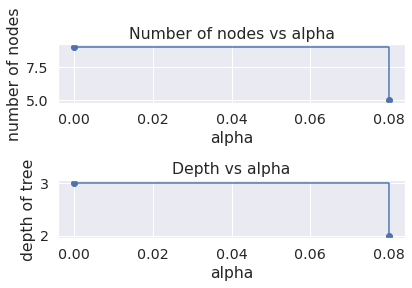

In [82]:
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

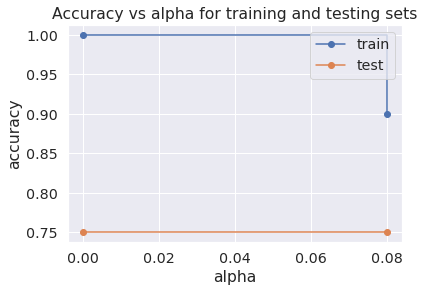

In [83]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [84]:
clf = DecisionTreeClassifier(ccp_alpha=0.04, criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04)

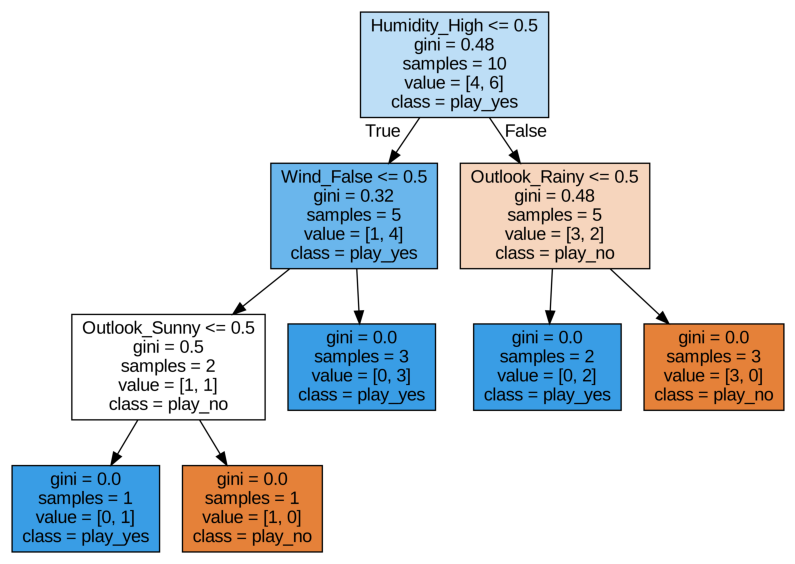

In [85]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot', feature_names = feature_names, class_names=['play_no','play_yes'], filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [86]:
test_pred_decision_tree = clf.predict(test_x)

In [87]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_y,test_pred_decision_tree)
print(confusion_matrix)

# matrix_df = pd.DataFrame(confusion_matrix)

# ax = plt.axes()

# sns.set(font_scale=1.3)

# plt.figure(figsize=(10,7))

# sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

# ax.set_title('Confusion Matrix - Decision Tree')

# ax.set_xlabel("Predicted label", fontsize =15)

# ax.set_xticklabels(['']+labels)

# ax.set_ylabel("True Label", fontsize=15)

# ax.set_yticklabels(list(labels), rotation = 0)

# plt.show()

[[0 1]
 [0 3]]


In [93]:
# What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humid-ity =’Normal’, and Wind = ’False’?
# clf.predict([[0, 1, 0, 0, 0, 1, 0, 1, 1, 0]])

# print(test_x)
# What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humid-ity =’High’, and Wind = ’True’?
clf.predict([[0, 0, 1, 1, 0, 0, 1, 0, 0, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)